In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA



from insole.dataHandler import *
from insole.unlabeledClassifier import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('combined_with_labels.csv', sep=";", header=0)
data = data.loc[data["Warning_code"] == 0]
#data = data.drop("App_time", axis=1)

data = data.loc[data["session"] == 2]

data = data.reset_index(drop=True)
basedf = data
basedf



,App_time,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,S1_end_time,S2_force,S2_start_time,S2_max_time,S2_end_time,S3_force,S3_start_time,S3_max_time,S3_end_time,S4_force,S4_start_time,S4_max_time,S4_end_time,S5_force,S5_start_time,S5_max_time,S5_end_time,S6_force,S6_start_time,S6_max_time,S6_end_time,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Left/Right,Size,Insole_id,label,session
0,19:52:24.205,1,0,980,64,10,90,860,53,0,690,830,57,0,90,910,51,30,200,940,68,100,520,980,84,120,370,980,70,120,860,980,385,90,0,0,574,370,0,L,40,5258,Good,2
1,19:52:25.399,2,1390,790,91,0,130,350,62,0,140,340,75,0,140,380,53,70,260,720,142,170,560,780,224,230,660,790,136,210,600,770,478,180,430,280,970,620,0,L,40,5258,Good,2
2,19:52:26.410,3,2520,670,108,0,110,300,72,0,120,290,81,0,110,330,48,60,180,610,154,100,480,670,212,200,560,670,144,160,500,660,556,150,367,290,960,510,0,L,40,5258,Good,2
3,19:52:27.429,4,3530,670,122,0,110,300,80,0,120,290,92,0,120,330,55,60,190,610,166,110,480,670,202,220,550,670,111,180,490,650,613,150,367,290,930,510,0,L,40,5258,Good,2
4,19:52:28.432,5,4540,670,122,0,100,290,77,0,110,280,90,0,100,300,61,60,180,600,164,100,470,670,212,130,550,670,121,110,480,640,622,140,415,290,955,510,0,L,40,5258,Good,2
5,19:52:29.433,6,5550,660,125,0,100,290,83,0,110,290,93,0,110,310,57,60,180,590,128,110,460,650,212,180,540,660,144,150,480,640,622,140,376,290,945,500,0,L,40,5258,Good,2
6,19:52:30.537,7,6540,660,120,0,110,300,80,0,120,290,92,0,110,320,55,60,180,590,146,110,470,660,202,200,540,660,150,130,490,640,619,150,373,300,960,500,0,L,40,5258,Good,2
7,19:52:31.405,8,7520,650,109,0,110,290,72,0,110,290,82,0,110,310,57,60,180,590,164,110,470,650,160,290,530,650,130,110,480,630,586,150,355,290,915,490,0,L,40,5258,Good,2
8,19:52:32.417,9,8510,670,127,0,120,300,84,0,130,300,94,0,120,620,51,60,180,610,166,120,480,670,198,280,550,670,110,220,480,650,637,150,331,290,960,510,0,L,40,5258,Good,2
9,19:52:33.423,10,9530,660,126,0,110,360,85,0,130,320,96,0,120,620,57,50,370,610,186,130,480,660,198,290,540,660,94,270,470,640,650,150,325,280,1065,500,0,L,40,5258,Good,2


In [4]:
tforce_DF = calculateTotalForce(data)
#tforce_DF
step_t_DF = calculateStepTime(data)
#step_t_DF
force_diff_DF = calculateForceDiff(data)
#force_diff_DF

featDF_L, featDF_R, featDF_Both  = getAllFeatures(data)
featDF_Both

,S0_force,S1_force,S2_force,S3_force,S4_force,S5_force,S6_force,S0_press_time,S1_press_time,S2_press_time,S3_press_time,S4_press_time,S5_press_time,S6_press_time,S0_force_diff,S0_force_diff,S1_force_diff,S1_force_diff,S2_force_diff,S2_force_diff,S3_force_diff,S3_force_diff,S4_force_diff,S4_force_diff,S5_force_diff,S5_force_diff,S6_force_diff,S6_force_diff,total_force_diff,Contact_time,force_total,label
0,28,32,33,46,58,88,86,710.0,610.0,630.0,710.0,720.0,580.0,670.0,-36.0,-36.0,-21.0,-21.0,-24.0,-24.0,-5.0,-5.0,-10.0,-10.0,4.0,4.0,16.0,16.0,-76.0,740,371.0,Good
1,102,83,93,47,99,170,104,880.0,920.0,880.0,770.0,530.0,420.0,460.0,11.0,11.0,21.0,21.0,18.0,18.0,-6.0,-6.0,-43.0,-43.0,-54.0,-54.0,-32.0,-32.0,-85.0,960,698.0,Good
2,107,85,96,42,116,196,136,630.0,670.0,630.0,580.0,600.0,490.0,540.0,-1.0,-1.0,13.0,13.0,15.0,15.0,-6.0,-6.0,-38.0,-38.0,-16.0,-16.0,-8.0,-8.0,-41.0,720,778.0,Good
3,123,93,105,53,134,210,130,580.0,640.0,630.0,570.0,590.0,530.0,560.0,1.0,1.0,13.0,13.0,13.0,13.0,-2.0,-2.0,-32.0,-32.0,8.0,8.0,19.0,19.0,20.0,690,848.0,Good
4,140,99,113,60,132,214,115,630.0,680.0,680.0,570.0,580.0,530.0,550.0,18.0,18.0,22.0,22.0,23.0,23.0,-1.0,-1.0,-32.0,-32.0,2.0,2.0,-6.0,-6.0,26.0,680,873.0,Good
5,130,96,109,62,148,178,109,610.0,630.0,580.0,610.0,630.0,370.0,560.0,5.0,5.0,13.0,13.0,16.0,16.0,5.0,5.0,20.0,20.0,-34.0,-34.0,-35.0,-35.0,-10.0,680,832.0,Good
6,122,94,103,57,134,186,125,590.0,620.0,580.0,590.0,590.0,380.0,550.0,2.0,2.0,14.0,14.0,11.0,11.0,2.0,2.0,-12.0,-12.0,-16.0,-16.0,-25.0,-25.0,-24.0,690,821.0,Good
7,122,94,103,56,140,186,122,560.0,680.0,560.0,580.0,590.0,380.0,540.0,13.0,13.0,22.0,22.0,21.0,21.0,-1.0,-1.0,-24.0,-24.0,26.0,26.0,-8.0,-8.0,49.0,680,823.0,Good
8,136,97,107,56,146,208,101,640.0,700.0,640.0,560.0,590.0,510.0,550.0,9.0,9.0,13.0,13.0,13.0,13.0,5.0,5.0,-20.0,-20.0,10.0,10.0,-9.0,-9.0,21.0,700,851.0,Good
9,134,99,107,58,140,224,99,630.0,690.0,560.0,580.0,580.0,570.0,540.0,8.0,8.0,14.0,14.0,11.0,11.0,1.0,1.0,-46.0,-46.0,26.0,26.0,5.0,5.0,19.0,690,861.0,Good


In [5]:
labeled = pd.read_csv("combined_with_labels.csv", sep=";", header=0)
#labeled = labeled.loc[labeled["Warning_code"] == 0]

unlabeled = pd.read_csv("combined_unlabeled_data.csv", sep=",", header=0)
#unlabeled = unlabeled.loc[unlabeled["Warning_code"] == 0]

values_cols = ["Contact_time","S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force",
               "S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time",
               "S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time",
               "S4_max_time","S4_end_time","S5_force","S5_start_time","S5_max_time","S5_end_time",
               "S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force",
               "F2_time","F3_force","F3_time"]

xcols = ["S0_force","S1_force","S2_force","S3_force","S4_force","S5_force","S6_force",
                "S0_press_time","S1_press_time","S2_press_time","S3_press_time","S4_press_time","S5_press_time","S6_press_time",
                "S0_force_diff","S1_force_diff","S2_force_diff","S3_force_diff","S4_force_diff","S5_force_diff","S6_force_diff","total_force_diff",
                "Contact_time","force_total"]
ycols = ["label"]

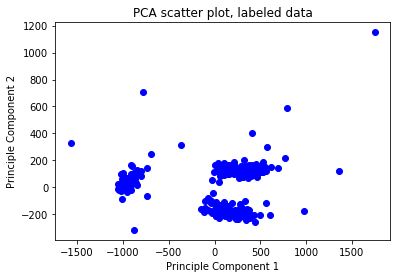

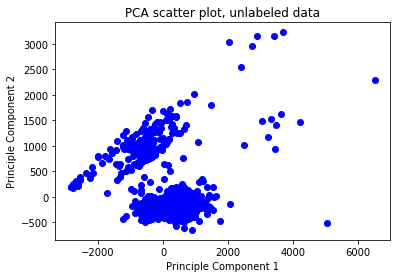

In [6]:
x = labeled.loc[:, values_cols] #original values in csv
y = labeled.loc[:, ycols]


unlabeled_x = unlabeled.loc[:, values_cols]
unlabeled_x


pca1=PCA(n_components=2, svd_solver='full')
pca1.fit(x)

pca2=PCA(n_components=2, svd_solver='full')
pca2.fit(unlabeled_x)

T1=pca1.transform(x)
T2=pca2.transform(unlabeled_x)

#Dataframe from T
T1df=pd.DataFrame(T1)
T1df.columns=["c1","c2"]
T2df=pd.DataFrame(T2)
T2df.columns=["c1","c2"]

plt.scatter(T1df["c1"], T1df["c2"], c="b")
plt.title("PCA scatter plot, labeled data")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

plt.scatter(T2df["c1"], T2df["c2"], c="b")
plt.title("PCA scatter plot, unlabeled data")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

In [7]:
#k = findBestK(x, y, 1, 10, values_cols, ycols) #testing 2 to 20
k = 3
print("Best k =",k)

Best k = 3


In [8]:
semi_df = knnLabel(labeled, unlabeled_x, values_cols, ycols, k)
semi_df

,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,S2_force,S2_start_time,S2_max_time,S2_end_time,S3_force,S3_start_time,S3_max_time,S3_end_time,S4_force,S4_start_time,S4_max_time,S4_end_time,S5_force,S5_start_time,S5_max_time,S5_end_time,S6_force,S6_start_time,S6_max_time,S6_end_time,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,label
0,310,47,0,40,300,36,0,50,39,0,50,260,103,10,110,300,184,20,160,310,168,50,200,310,178,40,160,300,256,50,0,0,1210,140,Good
1,340,107,50,90,340,73,50,100,83,50,100,300,114,0,150,340,138,90,190,330,166,100,240,340,150,90,200,320,595,100,0,0,1130,170,Good
2,300,118,0,40,290,75,0,50,89,0,50,250,98,30,100,290,144,40,150,290,178,60,190,300,150,50,150,280,580,50,0,0,1070,130,Good
3,310,154,0,50,300,98,0,50,116,0,50,260,110,20,110,300,146,40,160,300,158,70,200,310,146,60,160,280,845,50,0,0,1135,130,Good
4,310,132,0,40,200,87,0,50,102,0,50,260,107,20,110,260,142,40,160,290,164,50,190,310,146,40,150,280,720,50,0,0,1130,130,Good
5,300,101,0,40,190,68,0,50,80,0,50,260,109,20,110,300,160,40,160,300,158,60,200,300,162,50,150,290,544,50,0,0,1155,130,Good
6,340,138,40,80,230,93,40,90,106,40,90,300,115,0,140,300,140,80,190,330,156,80,230,340,136,80,190,320,760,90,0,0,1095,160,Good
7,310,82,0,50,200,53,10,60,60,10,60,270,105,0,120,310,164,50,160,300,174,70,200,310,160,70,160,300,400,60,0,0,1160,150,Good
8,320,110,0,50,210,67,10,50,83,0,50,280,106,20,120,270,160,50,170,310,162,60,210,320,160,50,160,300,562,50,0,0,1170,140,Good
9,330,125,30,70,230,86,30,80,99,30,80,290,117,0,130,280,144,60,180,320,144,80,220,330,146,70,180,310,735,80,0,0,1125,150,Good


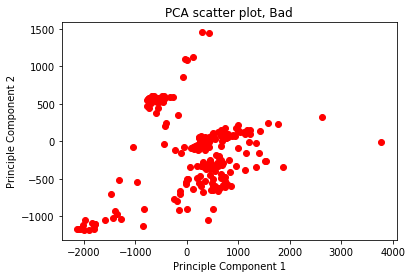

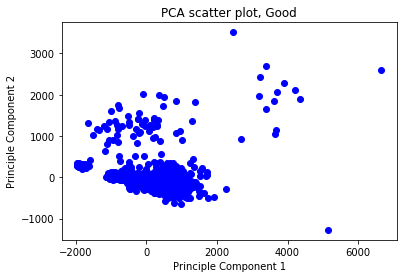

In [9]:
semi_df_bad = semi_df.loc[semi_df["label"] == "Bad"]
x = semi_df_bad.loc[:, values_cols] #original values in csv
y = semi_df_bad.loc[:, ycols]

pca=PCA(n_components=2, svd_solver='full')
pca.fit(x)

T=pca.transform(x)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

plt.scatter(Tdf["c1"], Tdf["c2"], c="r")
plt.title("PCA scatter plot, Bad")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

semi_df_good = semi_df.loc[semi_df["label"] == "Good"]
x = semi_df_good.loc[:, values_cols] #original values in csv
y = semi_df_good.loc[:, ycols]

pca=PCA(n_components=2, svd_solver='full')
pca.fit(x)

T=pca.transform(x)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

plt.scatter(Tdf["c1"], Tdf["c2"], c="b")
plt.title("PCA scatter plot, Good")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

In [10]:
semi_df2 = labelSpreading(labeled, unlabeled_x, values_cols, ycols, alpha_v=0.8)
semi_df2

C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\semi_supervised\label_propagation.py:292: ConvergenceWarning: max_iter=30 was reached without convergence.
  category=ConvergenceWarning


,App_time,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,S1_end_time,S2_force,S2_start_time,S2_max_time,S2_end_time,S3_force,S3_start_time,S3_max_time,S3_end_time,S4_force,S4_start_time,S4_max_time,S4_end_time,S5_force,S5_start_time,S5_max_time,S5_end_time,S6_force,S6_start_time,S6_max_time,S6_end_time,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Left/Right,Size,Insole_id,label,session
0,19:56:14.207,1.0,0.0,310,47,0,40,300,36,0,50,210.0,39,0,50,260,103,10,110,300,184,20,160,310,168,50,200,310,178,40,160,300,256,50,0,0,1210,140,0.0,L,40.0,5258.0,Good,1.0
1,19:56:14.905,2.0,670.0,340,107,50,90,340,73,50,100,340.0,83,50,100,300,114,0,150,340,138,90,190,330,166,100,240,340,150,90,200,320,595,100,0,0,1130,170,0.0,L,40.0,5258.0,Good,1.0
2,19:56:15.817,3.0,1410.0,300,118,0,40,290,75,0,50,190.0,89,0,50,250,98,30,100,290,144,40,150,290,178,60,190,300,150,50,150,280,580,50,0,0,1070,130,0.0,L,40.0,5258.0,Good,1.0
3,19:56:16.306,4.0,2100.0,310,154,0,50,300,98,0,50,200.0,116,0,50,260,110,20,110,300,146,40,160,300,158,70,200,310,146,60,160,280,845,50,0,0,1135,130,0.0,L,40.0,5258.0,Good,1.0
4,19:56:17.031,5.0,2820.0,310,132,0,40,200,87,0,50,200.0,102,0,50,260,107,20,110,260,142,40,160,290,164,50,190,310,146,40,150,280,720,50,0,0,1130,130,0.0,L,40.0,5258.0,Good,1.0
5,19:56:17.735,6.0,3530.0,300,101,0,40,190,68,0,50,250.0,80,0,50,260,109,20,110,300,160,40,160,300,158,60,200,300,162,50,150,290,544,50,0,0,1155,130,0.0,L,40.0,5258.0,Good,1.0
6,19:56:18.448,7.0,4200.0,340,138,40,80,230,93,40,90,230.0,106,40,90,300,115,0,140,300,140,80,190,330,156,80,230,340,136,80,190,320,760,90,0,0,1095,160,0.0,L,40.0,5258.0,Good,1.0
7,19:56:19.241,8.0,4910.0,310,82,0,50,200,53,10,60,200.0,60,10,60,270,105,0,120,310,164,50,160,300,174,70,200,310,160,70,160,300,400,60,0,0,1160,150,0.0,L,40.0,5258.0,Good,1.0
8,19:56:19.832,9.0,5600.0,320,110,0,50,210,67,10,50,200.0,83,0,50,280,106,20,120,270,160,50,170,310,162,60,210,320,160,50,160,300,562,50,0,0,1170,140,0.0,L,40.0,5258.0,Good,1.0
9,19:56:20.531,10.0,6290.0,330,125,30,70,230,86,30,80,220.0,99,30,80,290,117,0,130,280,144,60,180,320,144,80,220,330,146,70,180,310,735,80,0,0,1125,150,0.0,L,40.0,5258.0,Good,1.0


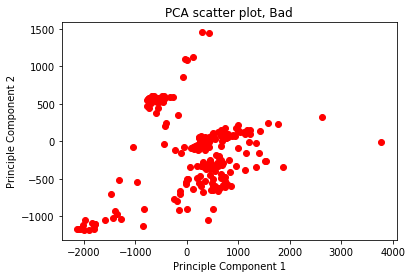

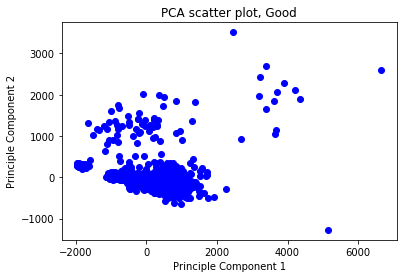

In [11]:
semi_df2_bad = semi_df2.loc[semi_df["label"] == "Bad"]
x = semi_df2_bad.loc[:, values_cols] #original values in csv
y = semi_df2_bad.loc[:, ycols]

pca=PCA(n_components=2, svd_solver='full')
pca.fit(x)

T=pca.transform(x)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

plt.scatter(Tdf["c1"], Tdf["c2"], c="r")
plt.title("PCA scatter plot, Bad")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

semi_df2_good = semi_df2.loc[semi_df["label"] == "Good"]
x = semi_df2_good.loc[:, values_cols] #original values in csv
y = semi_df2_good.loc[:, ycols]

pca=PCA(n_components=2, svd_solver='full')
pca.fit(x)

T=pca.transform(x)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

plt.scatter(Tdf["c1"], Tdf["c2"], c="b")
plt.title("PCA scatter plot, Good")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()